# Datos covid-19



In [91]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
data = pd.read_csv('data/confirmed.csv')
data.drop(['Province/State', 'Lat', 'Long'], 1, inplace=True)
#data.sort_values('Country/Region')
data.rename(columns={'Country/Region': 'Country'}, inplace=True)
data[data.Country == 'Australia']

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
6,Australia,0,0,0,0,3,4,4,4,4,...,48,55,65,65,92,112,134,171,210,267
7,Australia,0,0,0,0,1,1,1,1,2,...,15,18,21,21,36,49,57,71,94,121
8,Australia,0,0,0,0,0,0,0,1,3,...,15,18,20,20,35,46,61,68,78,94
19,Australia,0,0,0,0,0,0,0,0,0,...,7,7,9,9,16,19,20,29,29,37
22,Australia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,Australia,0,0,0,0,0,0,0,0,0,...,4,6,9,9,14,17,17,28,31,35
61,Australia,0,0,0,0,0,0,0,0,0,...,2,2,3,3,5,5,6,7,7,10
71,Australia,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
402,Australia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,2,3


In [52]:
group = data.groupby('Country').sum()
group.head(8)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,5,7,7,7,11,16,21,22,22
Albania,0,0,0,0,0,0,0,0,0,0,...,2,10,12,23,33,38,42,51,55,59
Algeria,0,0,0,0,0,0,0,0,0,0,...,20,20,20,24,26,37,48,54,60,74
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,39,39
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
Argentina,0,0,0,0,0,0,0,0,0,0,...,12,17,19,19,31,34,45,56,68,79
Armenia,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,8,18,26,52,78,84
Australia,0,0,0,0,4,5,5,6,9,9,...,91,107,128,128,200,250,297,377,452,568


In [81]:
by_date = group.transpose()
by_date.index.names = ['Date']
by_date.index = pd.to_datetime(by_date.index)
by_date.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [89]:
by_date[['Mexico', 'Spain']].tail(21)

Country,Mexico,Spain
Date,,
2020-02-27,0,15
2020-02-28,1,32
2020-02-29,4,45
2020-03-01,5,84
2020-03-02,5,120
2020-03-03,5,165
2020-03-04,5,222
2020-03-05,5,259
2020-03-06,6,400


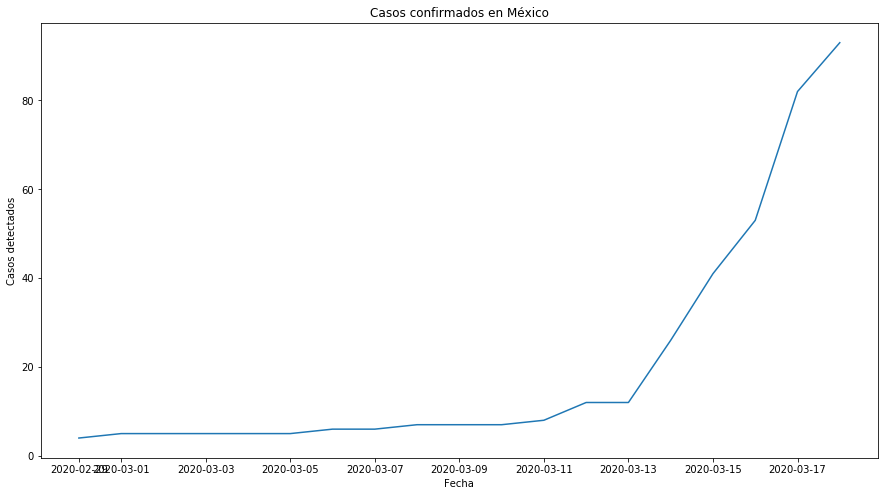

In [111]:
plt.figure(figsize=(15, 8))
plt.title('Casos confirmados en México')
plt.xlabel('Fecha')
plt.ylabel('Casos detectados')
plt.plot(by_date.loc[by_date.index > '2020-02-28', 'Mexico'])
plt.show()

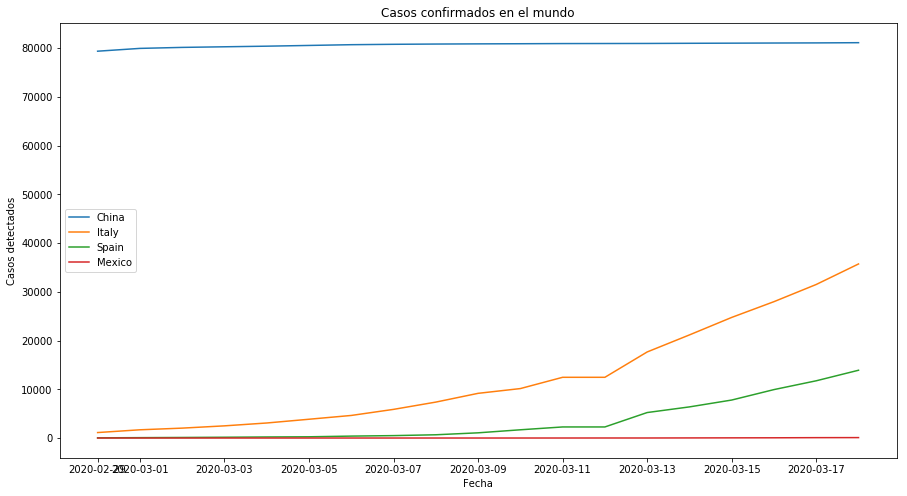

In [124]:
plt.figure(figsize=(15, 8))
plt.title('Casos confirmados en el mundo')
plt.xlabel('Fecha')
plt.ylabel('Casos detectados')
plt.plot(by_date.loc[by_date.index > '2020-02-28', ['China', 'Italy', 'Spain', 'Mexico']])
plt.legend(['China', 'Italy', 'Spain', 'Mexico'])
plt.show()